In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
path="/content/drive/MyDrive/NSE-TATAGLOBAL.csv"
df=pd.read_csv(path)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
dataset_train = pd.read_csv('/content/drive/MyDrive/NSE-TATAGLOBAL.csv')

In [ ]:
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 24s 174ms/step - loss: 0.0134
Epoch 2/100
62/62 [==============================] - 7s 107ms/step - loss: 0.0037
Epoch 3/100
62/62 [==============================] - 9s 148ms/step - loss: 0.0030
Epoch 4/100
62/62 [==============================] - 7s 108ms/step - loss: 0.0025
Epoch 5/100
62/62 [==============================] - 9s 149ms/step - loss: 0.0028
Epoch 6/100
62/62 [==============================] - 10s 160ms/step - loss: 0.0024
Epoch 7/100
62/62 [==============================] - 8s 133ms/step - loss: 0.0023
Epoch 8/100
62/62 [==============================] - 7s 117ms/step - loss: 0.0022
Epoch 9/100
62/62 [==============================] - 9s 145ms/step - loss: 0.0022
Epoch 10/100
62/62 [==============================] - 7s 117ms/step - loss: 0.0020
Epoch 11/100
62/62 [==============================] - 9s 137ms/step - loss: 0.0019
Epoch 12/100
62/62 [==============================] - 7s 113ms/step - loss: 0.0017
Epoch 13/10

In [ ]:
dataset_test = pd.read_csv('/content/drive/MyDrive/tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 5s 5s/step


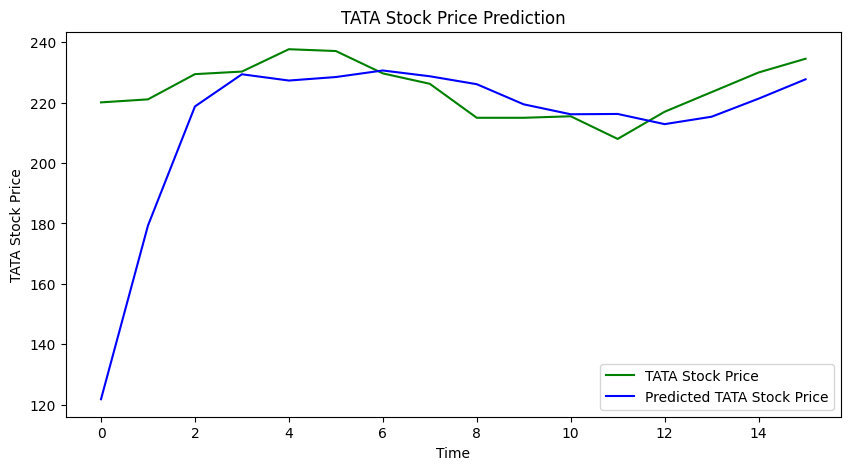

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(real_stock_price, color = 'green', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()